# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-15 20:00:11.117048


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/14/20


,10/14/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7916099,216872,2.74
Brazil,5140863,151747,2.95
India,7307097,111266,1.52
Mexico,829396,84898,10.24
United Kingdom,657459,43245,6.58
Italy,372799,36289,9.73
Peru,853974,33419,3.91


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/14/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
46455,US,7804199,2020-10-12,215085.0,317.0,41653.0,49542.428571
46454,US,7762546,2020-10-11,214768.0,398.0,44614.0,49243.000000
46453,US,7717932,2020-10-10,214370.0,618.0,54639.0,47941.571429
46452,US,7663293,2020-10-09,213752.0,990.0,57420.0,47285.142857
46451,US,7605873,2020-10-08,212762.0,961.0,56191.0,46868.857143
46450,US,7549682,2020-10-07,211801.0,915.0,50341.0,45234.285714
46449,US,7499341,2020-10-06,210886.0,705.0,41939.0,43957.714286


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/14/20


,10/14/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,477940,33316.0,6.97
Texas,832736,17188.0,2.06
California,865204,16729.0,1.93
New Jersey,216023,16191.0,7.50
Florida,741632,15595.0,2.10
Massachusetts,140992,9647.0,6.84
Illinois,330637,9320.0,2.82


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/14/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1599,California,857913,2020-10-12,16586.0,7.0,2723.0,3200.857143
1598,California,855190,2020-10-11,16579.0,12.0,2780.0,3211.000000
1597,California,852410,2020-10-10,16567.0,81.0,3334.0,3269.857143
1596,California,849076,2020-10-09,16486.0,68.0,3806.0,3294.714286
1595,California,845270,2020-10-08,16418.0,80.0,3342.0,3295.000000
1594,California,841928,2020-10-07,16338.0,94.0,3726.0,3259.000000
1593,California,838202,2020-10-06,16244.0,73.0,2695.0,3221.142857


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/14/20


,10/14/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,285016,6812.0,2.39
Orange,56283,1360.0,2.42
Riverside,62900,1264.0,2.01
San Bernardino,58936,986.0,1.67
San Diego,51327,844.0,1.64
San Joaquin,21064,477.0,2.26
Sacramento,23969,458.0,1.91


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/14/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5070,Los Angeles,282982,2020-10-12,6773.0,2.0,847.0,1148.571429
5069,Los Angeles,282135,2020-10-11,6771.0,3.0,970.0,1081.428571
5068,Los Angeles,281165,2020-10-10,6768.0,27.0,1256.0,1075.285714
5067,Los Angeles,279909,2020-10-09,6741.0,15.0,1244.0,1036.571429
5066,Los Angeles,278665,2020-10-08,6726.0,17.0,1220.0,1042.000000
5065,Los Angeles,277445,2020-10-07,6709.0,28.0,1589.0,1020.857143
5064,Los Angeles,275856,2020-10-06,6681.0,27.0,914.0,938.857143
5063,Los Angeles,274942,2020-10-05,6654.0,7.0,377.0,926.714286
5062,Los Angeles,274565,2020-10-04,6647.0,5.0,927.0,966.285714
5061,Los Angeles,273638,2020-10-03,6642.0,16.0,985.0,950.000000



7 day new US cases as of 10/14/20


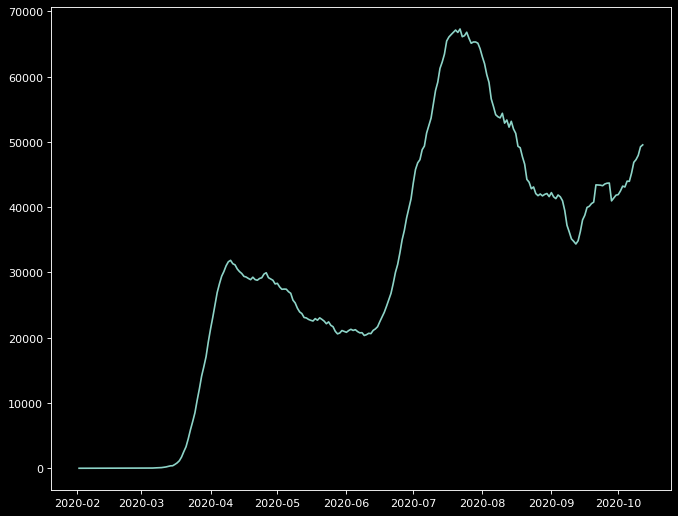

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/14/20


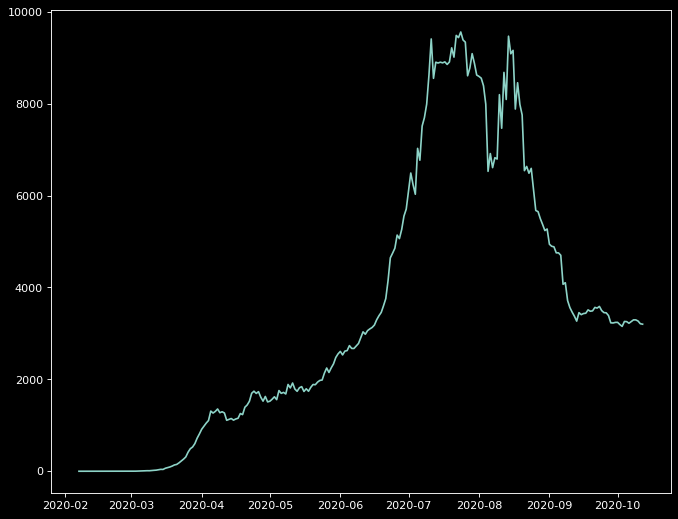

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/14/20


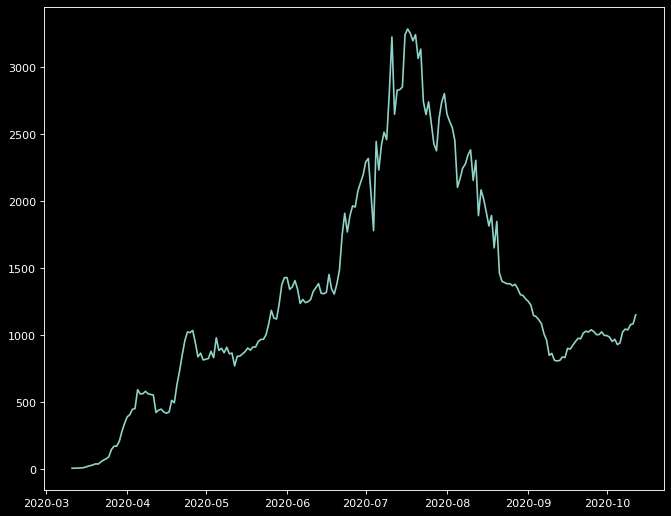

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()